A medical health insurance cost prediction model using linear regression to predict the health insurance cost of a new customer person based on current health insurance information.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [29]:
path = "/content/drive/MyDrive/Career Growth/Projects/Medical Cost Prediction/health_insurance_data.csv"
df = pd.read_csv(path)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Data Exploration**

In [30]:
df.shape

(1338, 7)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [34]:
df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


**Data Visualization**

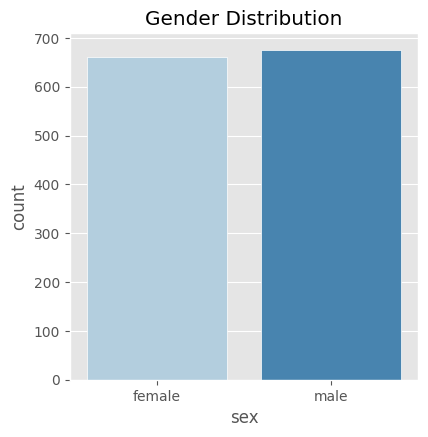

In [35]:
plt.figure(figsize = (4.5, 4.5))
style.use('ggplot')
sns.countplot(x ='sex', data =df, palette = 'Blues', edgecolor = 'w')
plt.title('Gender Distribution')
plt.show()

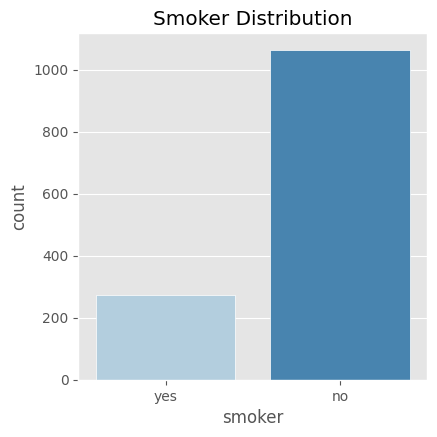

In [36]:
plt.figure(figsize = (4.5, 4.5))
sns.countplot (x ='smoker', data = df, palette = 'Blues', edgecolor = 'w')
plt.title('Smoker Distribution')
plt.show()

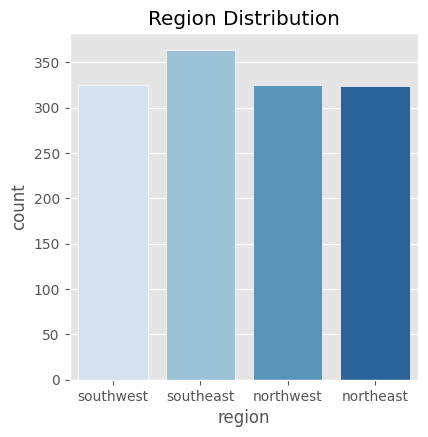

In [37]:
plt.figure(figsize = (4.5, 4.5))
sns.countplot (x ='region', data = df, palette = 'Blues', edgecolor = 'w')
plt.title('Region Distribution')
plt.show()

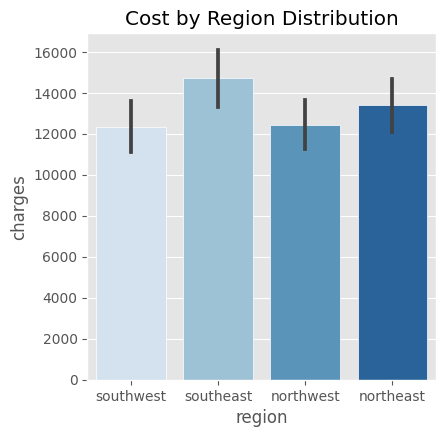

In [38]:
plt.figure(figsize = (4.5, 4.5))
sns.barplot (x ='region', y ='charges', data = df, palette = 'Blues', edgecolor = 'w')
plt.title('Cost by Region Distribution')
plt.show()

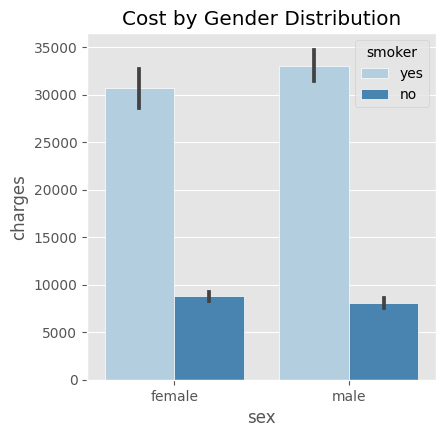

In [39]:
plt.figure(figsize = (4.5, 4.5))
sns.barplot (x ='sex', y ='charges', hue = 'smoker', data = df, palette = 'Blues', edgecolor = 'w')
plt.title('Cost by Gender Distribution')
plt.show()

**Box Plot**
: A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.

<Axes: xlabel='region', ylabel='charges'>

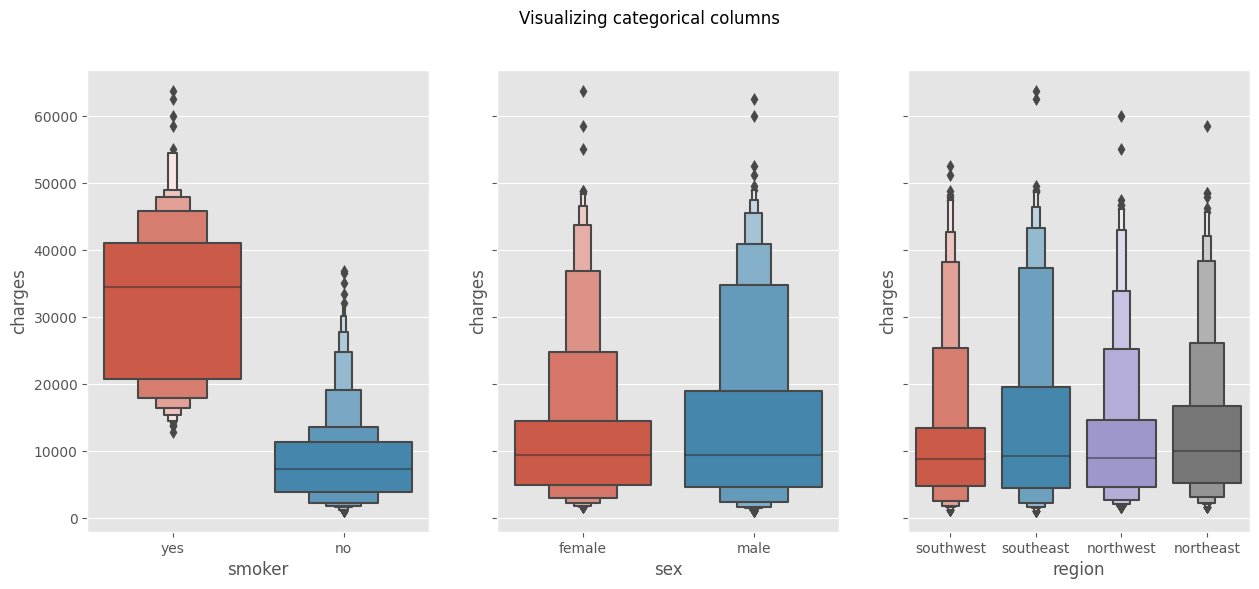

In [40]:
fig, axes = plt.subplots(1,3, figsize=(15,6), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y= 'charges', data=df, ax=axes[0])
sns.boxenplot(x='sex', y= 'charges', data=df, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=df, ax=axes[2])

**Histogam**
: a graphical representation of data points organized into user-specified ranges

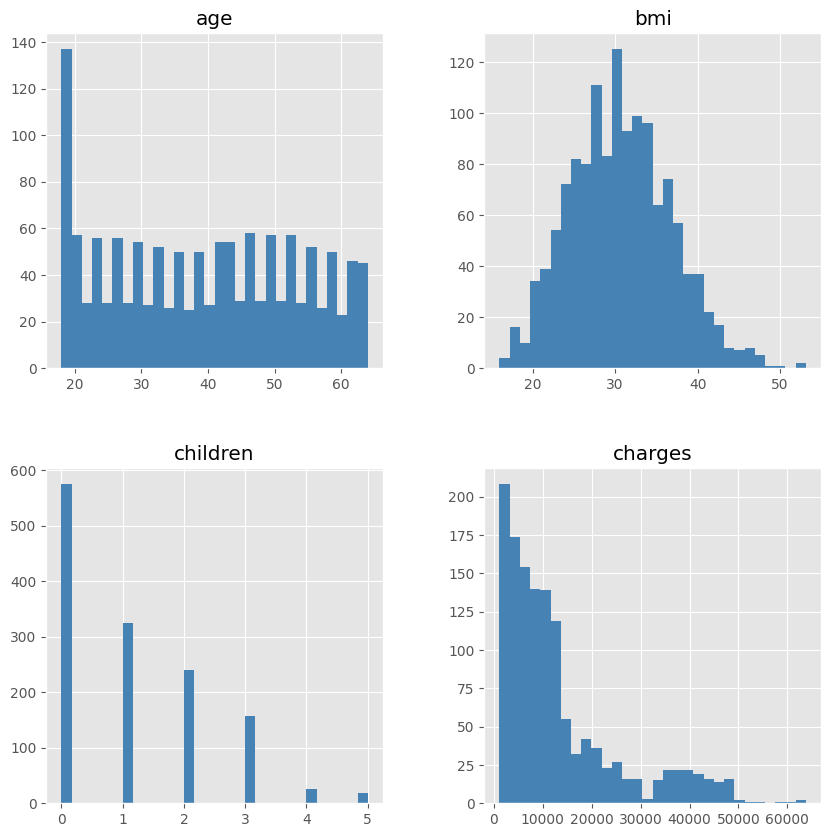

In [41]:
df[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='steelblue')
plt.show()

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Converting categorical variables into numerical



In [43]:
df ['sex'] = df ['sex'].apply({'male':0, 'female':1}.get)

df ['smoker'] = df ['smoker'].apply({'yes':1, 'no':0}.get)

df ['region'] = df ['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [44]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


**Heat Map**
: a data visualization technique that shows magnitude of a phenomenon as color in two dimensions

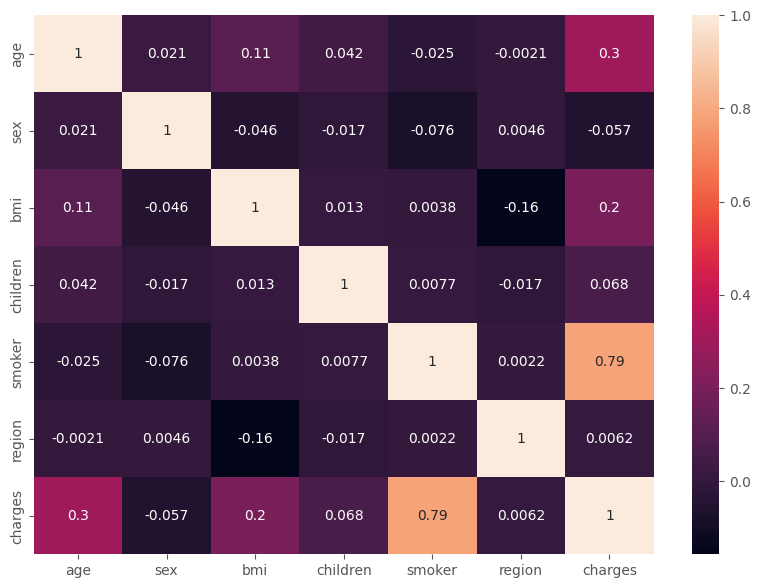

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

From the heat map above, being a smoker has a high correlation target variable of cost (lighter in color or closer to 1) while gender/sex has a low correlation with target variable of cost (darker in color scale or closer to 0, negative).

In [46]:
# dropping the charges and sex column because there is low correlation

X = df.drop(['charges', 'sex'], axis=1)
y = df.charges

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (936, 5)
X_test shape:  (402, 5)
y_train shape:  (936,)
y_test shape:  (402,)


**Linear Regression Model**


In [48]:
linreg = LinearRegression()

In [49]:
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)

In [50]:
#from sklearn.metrics import r2_score

# r2_ score shows how well your model fits into the data, generally a higher r2_score means a better fit.

In [51]:
print("R2 score: ",(r2_score(y_test, pred)).round(4))

R2 score:  0.7697


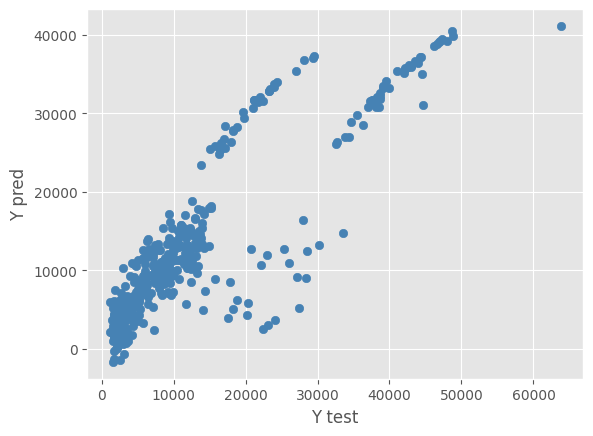

In [52]:
#Scatter plot of how well our Linear Regression Model predicts

plt.scatter(y_test, pred, color = 'steelblue')
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

**Predicting the health insurance cost of a new customer**

In [53]:
#creating sample data
data = {'age':50, 'bmi':25, 'children':2, 'smoker':0, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,0,2


In [54]:
#predicting the actual health insurance cost of particular customer 0 above
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of a new customer who is not a smoker is: $", cost_pred.round(2))

The medical insurance cost of a new customer who is not a smoker is: $ [9579.87]


In [55]:
#creating sample data
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [56]:
#predicting the actual health insurance cost of particular customer 0 above
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of a new customer who is a smoker is: $", cost_pred.round(2))

The medical insurance cost of a new customer who is a smoker is: $ [33206.93]


In [57]:
33206.93 - 9579.87

23627.059999999998

The health insurance cost difference between a new customer who is a smoker compared to a new customer who is not a smoker is about $20,000 more.